## Description

This notebook attempts to reproduce the methods used to create the [plot by Thompson on Wikipedia traffic between January 1st, 2008 and September 1st, 2017](https://wiki.communitydata.cc/upload/4/48/En-wikipedia_traffic_200801-201709_thompson.png) (referred to in this notebook as the "Thompson plot"):
    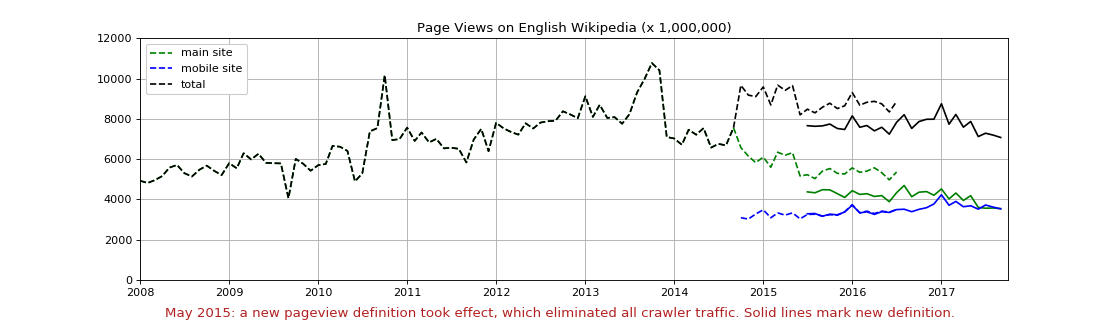
    
The underlying Wikipedia traffic data is downloaded directly from two Wikimedia APIs as json objects: Wikimedia Legacy API (using data between 2007-12-01 and 2016-08-01, incl.) & Wikimedia Pageviews API (using data between 2015-07-01 and 2018-09-01, incl.). From the Legacy API, the traffic data is collected from desktop and mobile users. From the Pageviews API, the traffic data is collected from desktop, mobile app, and mobile web users. In total, 5 json objects are created at the end of the data acquisition phase.

The json objects are transformed into separate pandas dataframes and appended to a final dataframe (called *wikipedia_traffic*) having a common date range among all datasets. All json objects and the *wikipedia_traffic* dataframe are exported.

Lastly, the Thompson plot is reproduced and displayed in this notebook.

**Comments**:
* This notebook doesn't exactly reproduce the Thompson plot because it includes an additional year of data. 
* This reproduction shows that the Thompson plot omitted two months of Legacy API data: 2007-12 & 2016-08. Presumably, Thompson excluded these months because the traffic data was about an order of magnitude smaller than the recent trend up until those selected months. If these months were included, the reproduced Thompson plot would have jarring spikes for Legacy API data that distract from the overall trends.
* A key difference between the two Wikimedia APIs is in their handling of spider/bot traffic. The Legacy API makes no distinction between organic user traffic and spider/bot traffic; however starting on 2015-05, the Pageviews API eliminated spider/bot traffic from its views metric.

## Data Acquisition

Relevant packages are imported below.

**Note:** The following 5 code blocks were adapted from the example found below:

    http://paws-public.wmflabs.org/paws-public/User:Jtmorgan/data512_a1_example.ipynb

In [1]:
# Adapted from http://paws-public.wmflabs.org/paws-public/User:Jtmorgan/data512_a1_example.ipynb

import json
import requests
import os
import pandas as pd
import csv
import matplotlib.pyplot as plt

%matplotlib inline

Next, the endpoints for each API are defined as strings.

In [2]:
# Adapted from http://paws-public.wmflabs.org/paws-public/User:Jtmorgan/data512_a1_example.ipynb

# Define each API endpoint as a string
# APIs used in this notebook: Wikimedia Legacy, Wikimedia Pageviews
endpoint_legacy = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'

endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

Parameters and a header are defined as dictionaries for accessing each endpoint.

In [3]:
# Adapted from http://paws-public.wmflabs.org/paws-public/User:Jtmorgan/data512_a1_example.ipynb

# Define parameters for each API and access type (e.g., desktop vs mobile)
params_legacy_desktop = {"project" : "en.wikipedia.org",
                 "access-site" : "desktop-site",
                 "granularity" : "monthly",
                 "start" : "2001010100",
                # for end use 1st day of month following final month of data
                 "end" : "2018100100"
                    }

params_legacy_mobile = {"project" : "en.wikipedia.org",
                 "access-site" : "mobile-site",
                 "granularity" : "monthly",
                 "start" : "2001010100",
                # for end use 1st day of month following final month of data
                 "end" : "2018100100"
                    }

params_pageviews_desktop = {"project" : "en.wikipedia.org",
                    "access" : "desktop",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2001010100",
                    # for end use 1st day of month following final month of data
                    "end" : '2018101000'
                        }

params_pageviews_mobileapp = {"project" : "en.wikipedia.org",
                    "access" : "mobile-app",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2001010100",
                    # for end use 1st day of month following final month of data
                    "end" : '2018101000'
                        }

params_pageviews_mobileweb = {"project" : "en.wikipedia.org",
                    "access" : "mobile-web",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2001010100",
                    # for end use 1st day of month following final month of data
                    "end" : '2018101000'
                        }

headers = {
    'User-Agent': 'https://github.com/OO00OO00',
    'From': 'frierw@uw.edu'
}

Two functions are defined:

1) The function *api_call* uses a string representing the API endpoint and a dictionary representing API parameters as input to access the associated API. A json object is returned from *api_call*.

2) The function *write_json* uses a json object and a string representing the object's name as input to facilitate the exporting of the json object to a .json file.

In [4]:
# Adapted from http://paws-public.wmflabs.org/paws-public/User:Jtmorgan/data512_a1_example.ipynb

# Define a function used to call an API via requests
def api_call(endpoint,parameters):
    call = requests.get(endpoint.format(**parameters), headers=headers)
    response = call.json()
    
    return response

# Define a function to facilitate exporting json objects to .json files
def write_json(json_object, json_name):
    with open(json_name, 'w') as file:
        json.dump(json_object, file)

The 5 sets of API calls are executed below and stored in separate json objects.

In [5]:
# Adapted from http://paws-public.wmflabs.org/paws-public/User:Jtmorgan/data512_a1_example.ipynb

# Call each needed API call
monthly_legacy_desktop = api_call(endpoint_legacy, params_legacy_desktop)
monthly_legacy_mobile = api_call(endpoint_legacy, params_legacy_mobile)
monthly_pageviews_desktop = api_call(endpoint_pageviews, params_pageviews_desktop)
monthly_pageviews_mobileapp = api_call(endpoint_pageviews, params_pageviews_mobileapp)
monthly_pageviews_mobileweb = api_call(endpoint_pageviews, params_pageviews_mobileweb)

Lastly, each of the 5 json objects are exported to the working directory.

In [6]:
# Export json files from all API calls
write_json(monthly_legacy_desktop, 'pagecounts_desktop-site_200712-201608.json')
write_json(monthly_legacy_mobile, 'pagecounts_mobile-site_201410-201608.json')
write_json(monthly_pageviews_desktop, 'pageviews_desktop_201507-201809.json')
write_json(monthly_pageviews_mobileapp, 'pageviews_mobile-app_201507-201809.json')
write_json(monthly_pageviews_mobileweb, 'pageviews_mobile-web_201507-201809.json')

## Data Processing

The function *expand_wikimedia_json* is defined below. *expand_wikimedia_json* takes a json object as input and expands its json components as separate columns of a new pandas dataframe, which is then returned. The timestamp json component is also used to create *year* and *month* columns in the returned dataframe.

*expand_wikimedia_json* is then applied to each of the 5 json objects. (Restating each json object as a dataframe is a design choice to make data wrangling simpler.)

In [6]:
# Define function to facilitate expanding elements of each json object
def expand_wikimedia_json(json_object):
    # 1) Convert json to dataframe    
    # 2) For each dictionary in the 1st column, restate its keys as new columns    
    # Note: Step 2 is motivated from the following Stack Overflow post by Hafizur Rahman:
    #    https://stackoverflow.com/a/49312873/3905509
    
    df = pd.DataFrame.from_dict(json_object).iloc[:,0].apply(pd.Series)
    
    # 3) Define year and month columns from the timestamp column
    df['year'] = df['timestamp'].str.slice(0,4)
    df['month'] = df['timestamp'].str.slice(4,6)
    return df

# Expand each wikimedia json object into a pandas dataframe
monthly_legacy_desktop_df = expand_wikimedia_json(monthly_legacy_desktop)
monthly_legacy_mobile_df = expand_wikimedia_json(monthly_legacy_mobile)
monthly_pageviews_desktop_df = expand_wikimedia_json(monthly_pageviews_desktop)
monthly_pageviews_mobileapp_df = expand_wikimedia_json(monthly_pageviews_mobileapp)
monthly_pageviews_mobileweb_df = expand_wikimedia_json(monthly_pageviews_mobileweb)

Below, the new dataframe *traffic_date_range* represents the union of months used across all Wikimedia traffic data. Having a common set of months will help join all the traffic data together downstream.

The monthly traffic dataframes created in the prior code block use dates in the format *YYYY-MM*, but the pandas *date_range* method returns dates with the format *YYYY-MM-DD*. The dictionary *traffic_date_range_dict* is created to extract the year and month components of *traffic_date_range*.

Lastly, for the following code block, *traffic_date_range_dict* is restated as a dataframe in the new object *wikipedia_traffic_date_range*. *wikipedia_traffic_date_range* will be used as scaffolding to combine the various traffic data. 

In [7]:
# Define date range used for visualizing wikimedia traffic
traffic_date_range = pd.date_range(start = '2008-01', end = '2018-09', freq = 'MS')

# Restate traffic_date_range as a dictionary, split by year and month
traffic_date_range_dict = {'year': traffic_date_range.strftime('%Y'), 'month': traffic_date_range.strftime('%m')}

# Restate traffic_date_range_dict as a dataframe, for use in defining a common date range
wikipedia_traffic_date_range = pd.DataFrame(traffic_date_range_dict, columns = traffic_date_range_dict.keys())

Next, the function *match_wikimedia_date_range* appends the traffic data from dataframe *df* onto the common date range from *wikipedia_traffic_date_range*. The NA values in the appended traffic data are coalesced with 0. Lastly, the new traffic data column is relabled to make exported data more clear downstream.

*match_wikimedia_date_range* takes in as input:

* *df*, a pandas dataframe containing string columns 'year' and 'month', which represent the month of traffic data
* *column_to_0_coalesce*, a numeric column in *df* which will have its NA values changed into 0s, inplace. (This field is intended to be the column containing traffic data)
* *column_to_0_coalesce_new_name*, a string to relabel *column_to_0_coalesce*.
* *wikipedia_date_range*, a pandas dataframe containing string columns 'year' and 'month'. The default input for this field is *wikipedia_traffic_date_range*.
* *shared_key*, a list representing columns shared in *df* and *wikipedia_date_range* to be used as join predicate when left-joining *wikipedia_date_range* and *df* (where the former is the "left" dataframe).

*match_wikimedia_date_range* returns the merged dataframe *df_merge*.

Lastly, in the following code block, *match_wikimedia_date_range* is applied to each of the 5 traffic volume dataframes and stored in new dataframes with a common date range.

**Note**: The records representing the months of 2007-12 & 2016-08 are dropped from 2 Legacy dataframes, *monthly_legacy_desktop_df* and *monthly_legacy_mobile_df*. The data for these months are not present in the original Thompson. For close reproduction, they are also omitted in this notebook.

In [8]:
def match_wikimedia_date_range(df, column_to_0_coalesce, column_to_0_coalesce_new_name, wikipedia_date_range = wikipedia_traffic_date_range, shared_key = ['year', 'month']):
    # Since the wikimedia views have varying data ranges, do left-join from each wikimedia dataframe to the year-month range in wikipedia_date_range
    # Also, replace NaNs in column_to_0_coalesce column with 0's.
    
    df_merge = pd.merge(wikipedia_date_range, df, left_on = shared_key, right_on = shared_key, how = 'left')
    df_merge[column_to_0_coalesce].fillna(0, inplace = True)
    df_merge.rename(columns = {column_to_0_coalesce: column_to_0_coalesce_new_name}, inplace = True)
    return df_merge

# For legacy traffic data, drop records for 2007-12 & 2016-08 (i.e., the [1:-1] syntax below), which appear omitted in the Thompson plot.
monthly_legacy_desktop_df_date_range = match_wikimedia_date_range(df = monthly_legacy_desktop_df[1:-1], column_to_0_coalesce = 'count', column_to_0_coalesce_new_name = 'pagecount_desktop_views')
monthly_legacy_mobile_df_date_range = match_wikimedia_date_range(df = monthly_legacy_mobile_df[1:-1], column_to_0_coalesce = 'count', column_to_0_coalesce_new_name = 'pagecount_mobile_views')

monthly_pageviews_desktop_df_date_range = match_wikimedia_date_range(df = monthly_pageviews_desktop_df, column_to_0_coalesce = 'views', column_to_0_coalesce_new_name = 'pageview_desktop_views')
monthly_pageviews_mobileapp_df_date_range = match_wikimedia_date_range(df = monthly_pageviews_mobileapp_df, column_to_0_coalesce = 'views', column_to_0_coalesce_new_name = 'pageview_mobileapp_views')
monthly_pageviews_mobileweb_df_date_range = match_wikimedia_date_range(df = monthly_pageviews_mobileweb_df, column_to_0_coalesce = 'views', column_to_0_coalesce_new_name = 'pageview_mobileweb_views')

At this point in the notebook, we have 5 dataframes each with a common date range and a numeric column representing a different set of Wikimedia traffic volume. Below, a final dataframe called *wikipedia_traffic* is created, which will store all 5 sets of traffic volume.

First, *wikipedia_traffic* is copied from *wikipedia_traffic_date_range* to act as a dataframe key. Next, the 2 desktop traffic volume columns and the Legacy mobile traffic volume column are appended to *wikipedia_traffic*. (Note: We can directly append them without a formal join since we ensured *wikipedia_traffic* and each traffic volume dataframe have the same key and row order.) Next, the 2 Pageview mobile traffic volume columns are summed and then directly appended to *wikipedia_traffic* as the new column *pageview_mobile_views*. Then, each of the mobile and desktop columns of *wikipedia_traffic* (for each API) are summed to create the total traffic volume columns, *pagecount_all_views* and *pageview_all_views*.

Lastly, the columns of *wikipedia_traffic* are reordered to be more intuitive and *wikipedia_traffic* is exported as a csv file.

In [9]:
# Create final object to store all page count/view data. Copy key in wikipedia_traffic_date_range
wikipedia_traffic = wikipedia_traffic_date_range

# Append desktop view data
wikipedia_traffic['pagecount_desktop_views'] = monthly_legacy_desktop_df_date_range['pagecount_desktop_views']
wikipedia_traffic['pageview_desktop_views'] = monthly_pageviews_desktop_df_date_range['pageview_desktop_views']

# Append legacy mobile count data
wikipedia_traffic['pagecount_mobile_views'] = monthly_legacy_mobile_df_date_range['pagecount_mobile_views']

# Create combined mobile page view from pageviews data
wikipedia_traffic['pageview_mobile_views'] = monthly_pageviews_mobileapp_df_date_range['pageview_mobileapp_views'] + monthly_pageviews_mobileweb_df_date_range['pageview_mobileweb_views']

# Create total page counts from legacy data
wikipedia_traffic['pagecount_all_views'] = monthly_legacy_desktop_df_date_range['pagecount_desktop_views'] + monthly_legacy_mobile_df_date_range['pagecount_mobile_views']

# Create total page counts from pageviews data
wikipedia_traffic['pageview_all_views'] = monthly_pageviews_desktop_df_date_range['pageview_desktop_views'] + wikipedia_traffic['pageview_mobile_views']

# Reorder columns:
wikipedia_traffic = wikipedia_traffic.reindex(columns = ['year', 'month', 'pagecount_all_views', 'pagecount_desktop_views', 'pagecount_mobile_views', 'pageview_all_views', 'pageview_desktop_views', 'pageview_mobile_views'])

# Export wikipedia_traffic to csv
wikipedia_traffic.to_csv('en-wikipedia_traffic_200801-201809.csv', index = False)

## Analysis

In order to reproduce the Thompson plot as closely as possible, the 0 values in *wikipedia_traffic* are removed and the result is stored in the new dataframe *wikipedia_traffic_nonzero_views*. Next, the list *x_labels_idx* is created which represents the indices of *wikipedia_traffic* having the first instance of each year. *x_labels_idx* will be used to relabel the x-axis by year.

Finally, the Thompson plot is reproduced as a matplotlib.pyplot time series plot using all traffic volume columns from *wikipedia_traffic* (rescaled per 1 million views).

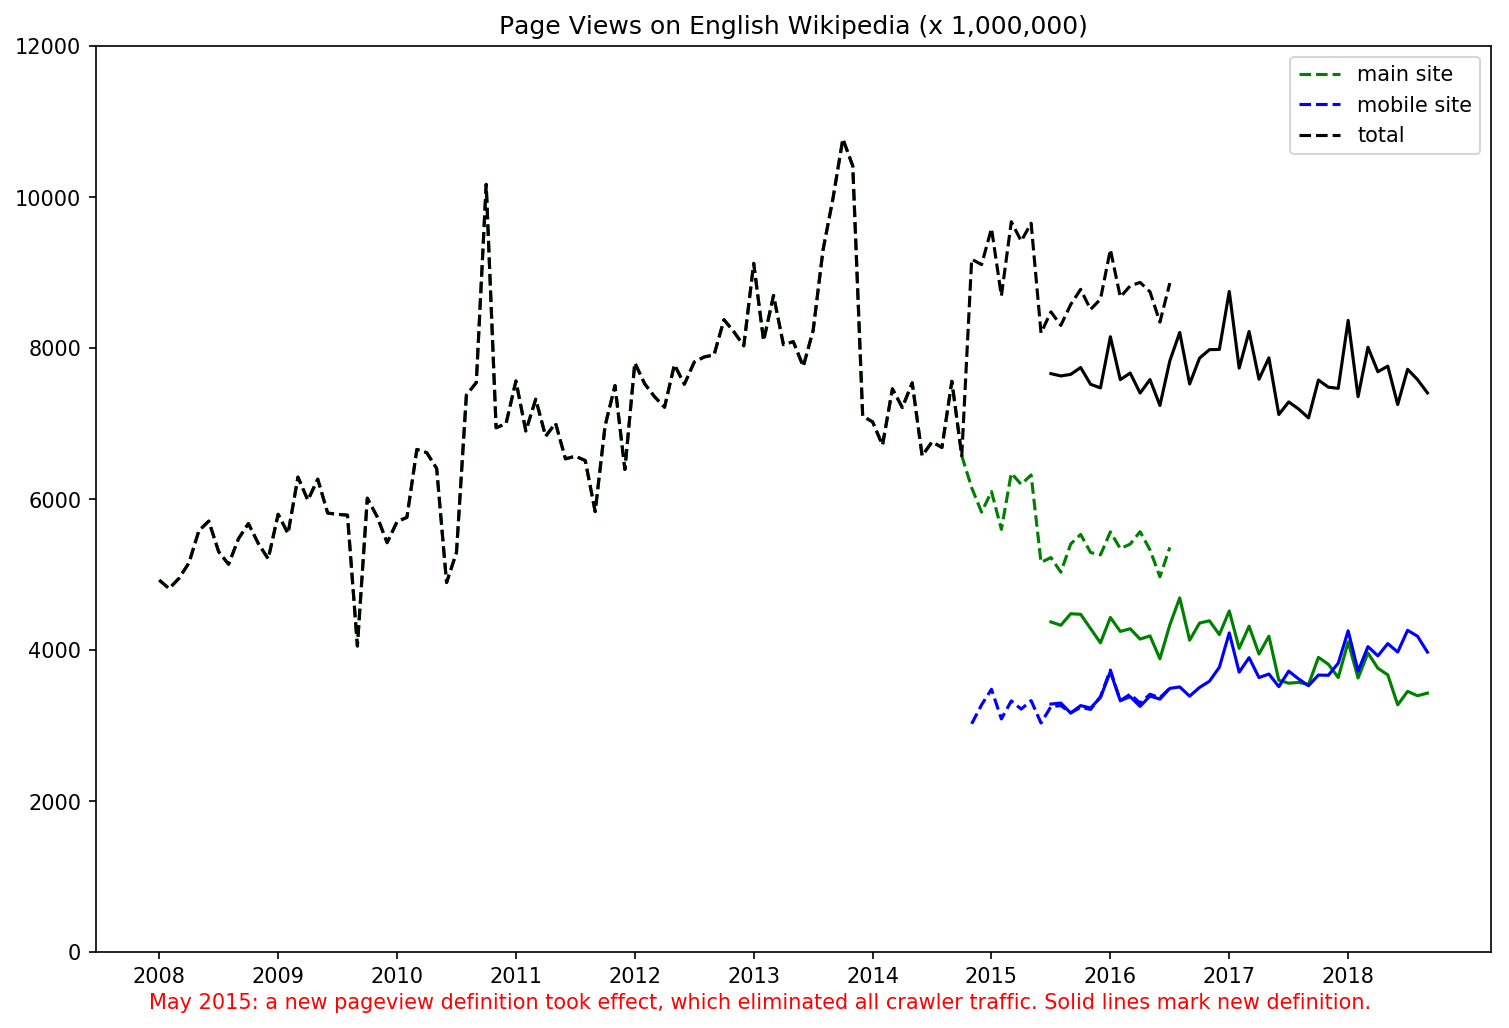

In [69]:
# To be consistent with the Thompson plot, dates with 0 pageviews are ignored for the plot
wikipedia_traffic_nonzero_views = wikipedia_traffic.replace({0: None})

# Create list to label the a-xis
x_labels_idx = [1]
x_labels_idx.extend([i*12 + 1 for i in range(1,11)])

# Plot wikimedia traffic
plt.figure()
plt.plot(wikipedia_traffic_nonzero_views.index.values, wikipedia_traffic_nonzero_views['pagecount_desktop_views']/1e6, linestyle = 'dashed', color = 'green', label = 'main site')
plt.plot(wikipedia_traffic_nonzero_views.index.values, wikipedia_traffic_nonzero_views['pagecount_mobile_views']/1e6, linestyle = 'dashed', color = 'blue', label = 'mobile site')
plt.plot(wikipedia_traffic_nonzero_views.index.values, wikipedia_traffic_nonzero_views['pagecount_all_views']/1e6, linestyle = 'dashed', color = 'black', label = 'total')

plt.plot(wikipedia_traffic_nonzero_views.index.values, wikipedia_traffic_nonzero_views['pageview_all_views']/1e6, linestyle = 'solid', color = 'black', label = '_nolegend_')
plt.plot(wikipedia_traffic_nonzero_views.index.values, wikipedia_traffic_nonzero_views['pageview_desktop_views']/1e6, linestyle = 'solid', color = 'green', label = '_nolegend_')
plt.plot(wikipedia_traffic_nonzero_views.index.values, wikipedia_traffic_nonzero_views['pageview_mobile_views']/1e6, linestyle = 'solid', color = 'blue', label = '_nolegend_')

plt.legend()

# Relabel the x-axis using the first instance of each year
plt.xticks(x_labels_idx, wikipedia_traffic_nonzero_views['year'][x_labels_idx])

# Use the same y-range as in the Thompson plot
plt.ylim(0, 12000)
%config InlineBackend.figure_format = 'png'
# plt.figure(figsize = (5, 4))
plt.rcParams["figure.figsize"] = [12, 8]
plt.rcParams['figure.dpi'] = 150

# Add the same ancillary text used in the Thompson plot
plt.title('Page Views on English Wikipedia (x 1,000,000)')
plt.text(0,-750, 'May 2015: a new pageview definition took effect, which eliminated all crawler traffic. Solid lines mark new definition.', color = 'red')
plt.show()